In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [6]:
import sys
sys.path.append('/home/dwu/DeepRecon/ReconNet/python')
import ReconNet

In [57]:
inputFile = '/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/refs.npy'
N0 = 2e5
paramFile = os.path.join('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/param.txt')
outputFile = os.path.join('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/imgs_%g.npy'%N0)
device = 1

In [62]:
print (outputFile)

/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/imgs_200000.npy


In [58]:
refs = (np.load(inputFile) + 1000) / 1000

In [59]:
reconNet = ReconNet.ReconNet()
reconNet.FromFile(paramFile)
reconNet.cSetDevice(device)

0

In [60]:
np.random.seed(0)
recons = []
for iSlice in range(refs.shape[0]):
# for iSlice in [45]:
    print (iSlice, end=',', flush=True)
    prjs = reconNet.cDDFanProjection3d(np.copy(refs[[iSlice], ...], 'C'))
    if N0 > 0:
        prjs = np.log(N0 / np.random.poisson(N0 * np.exp(-prjs * 0.019))) / 0.019
    fprjs = reconNet.cFilter3d(prjs, 2)
    recon = reconNet.cPixelBackprojection3d(fprjs)
    
    recons.append(recon)
recons = np.concatenate(recons, 0)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,

In [61]:
np.save(outputFile, np.copy(recons, 'C'))

In [13]:
imgs0 = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/real/data/imgs4d.npy', allow_pickle=True)

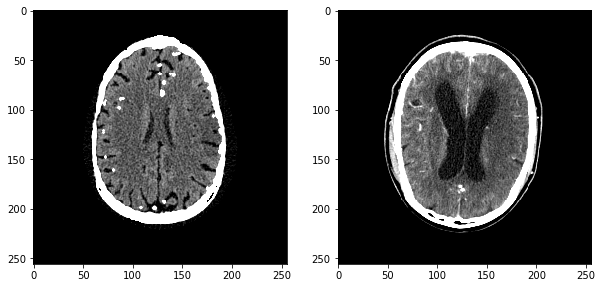

In [56]:
plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(np.mean(recons[[0],...,20], 0), 'gray', vmin=1, vmax=1.10)
plt.subplot(122);plt.imshow(imgs0[2][-1, ..., 25], 'gray', vmin=0, vmax=100)

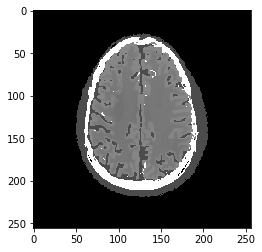

In [66]:
plt.imshow(refs[iSlice,...,25], 'gray', vmin=0.94, vmax=1.14)